<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/main/Turnover_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse du CA
## Par Valentin MONTEIRO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Valeeew
from valeeew import cleaning as cl

In [2]:
!git clone -l -s https://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 73 (delta 43), reused 16 (delta 6), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/cloned-repo
correlation_testing.ipynb  DATA_library.csv	transactions.csv
customers.csv		   products.csv		Turnover_analyze.ipynb
DATA_cleaning.ipynb	   Sales_analyze.ipynb


In [3]:
df = pd.read_csv("DATA_library.csv", index_col="date", parse_dates=True)

In [4]:
df
c = ["#2b2d42", "#4361ee", "#ef233c"]
pct = lambda x: str(round(x, 2)) + '%'

### Objectifs :

> - Indicateurs et graphiques autour du chiffre d'affaires.
- Évolution dans le temps et mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale
- Zoom sur les références:
 - tops et les flops
 - la répartition par catégorie
- Repérer des informations sur les profils des clients:
 - la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.
- Après, toutes les informations et tous graphiques qui apporteraient de l’information pertinente sont les bienvenus !

chiffre d'affaire total : 11856079.719559556
                     sum
date                    
2021-12-31  4.771752e+06
2022-12-31  6.109958e+06
2023-12-31  9.743692e+05


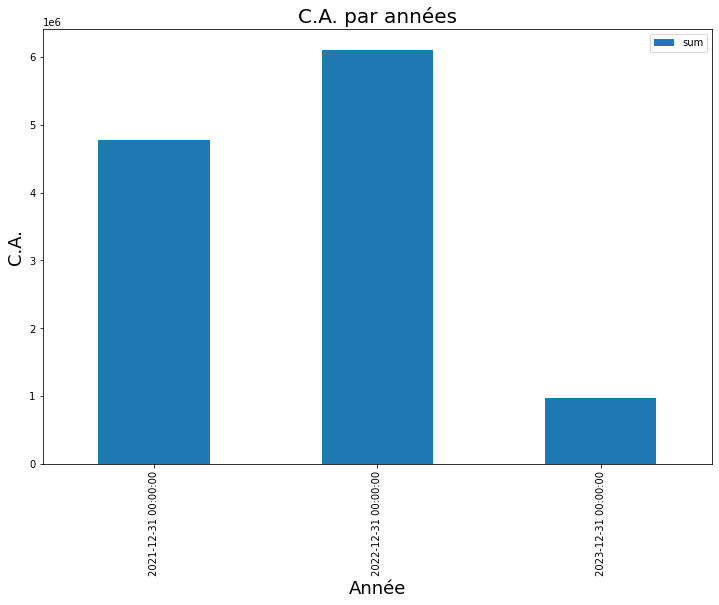

In [5]:
# Calcul du CA total
print("chiffre d'affaire total :", df.price.sum())
# Calcul du CA / années
turnover_annuel = df.price.resample('Y').agg(["sum"])
print(turnover_annuel)
# Graphique du CA / années
turnover_annuel.plot(kind="bar",figsize=[12,8])
plt.title("C.A. par années", fontsize=20)
plt.xlabel("Année", fontsize=18)
plt.ylabel("C.A.", fontsize=18)
plt.show
plt.savefig("C.A._par_années.png")

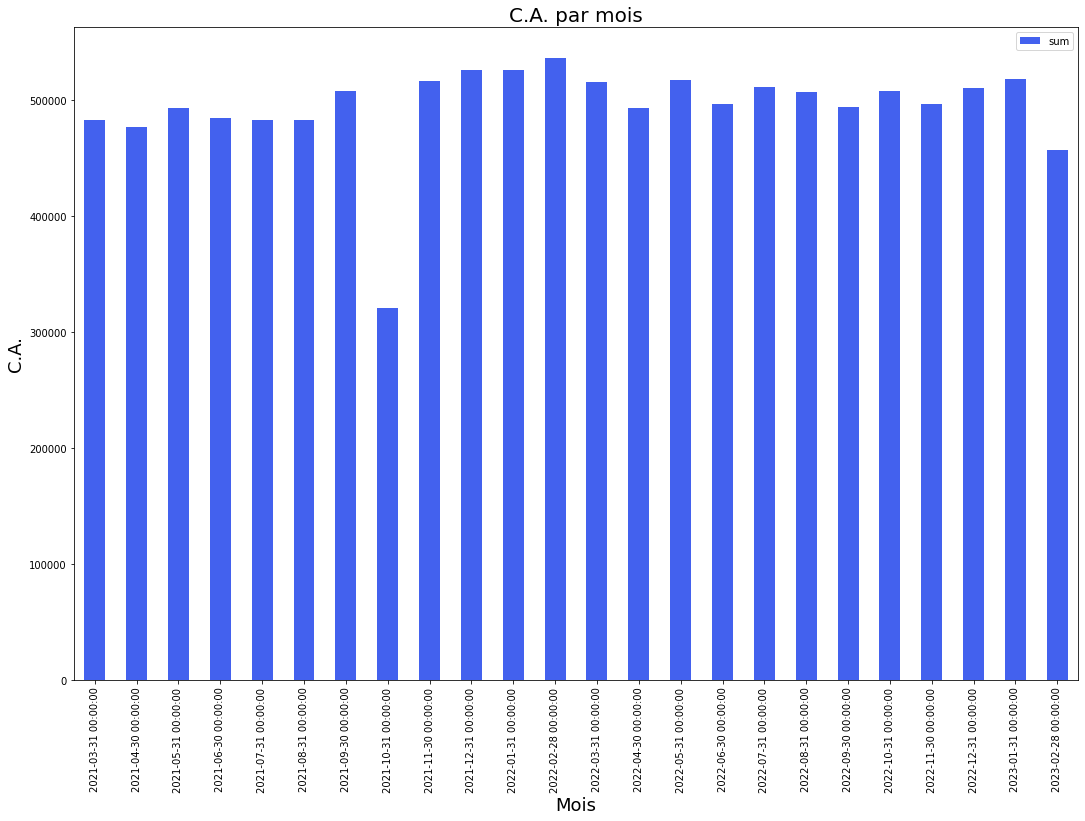

In [6]:
# Il n'y qu'une seul année complète, le graphique au dessus n'est pas suffisant
turnover_mensuel = df.price.resample('M').agg(["sum"])
turnover_mensuel.plot(kind="bar", figsize=(18,12), color="#4361ee")
plt.title("C.A. par mois", fontsize=20)
plt.xlabel("Mois", fontsize=18)
plt.ylabel("C.A.", fontsize=18)
plt.show
plt.savefig("C.A._par_mois.png")

> ## __Analyse des Catégories__

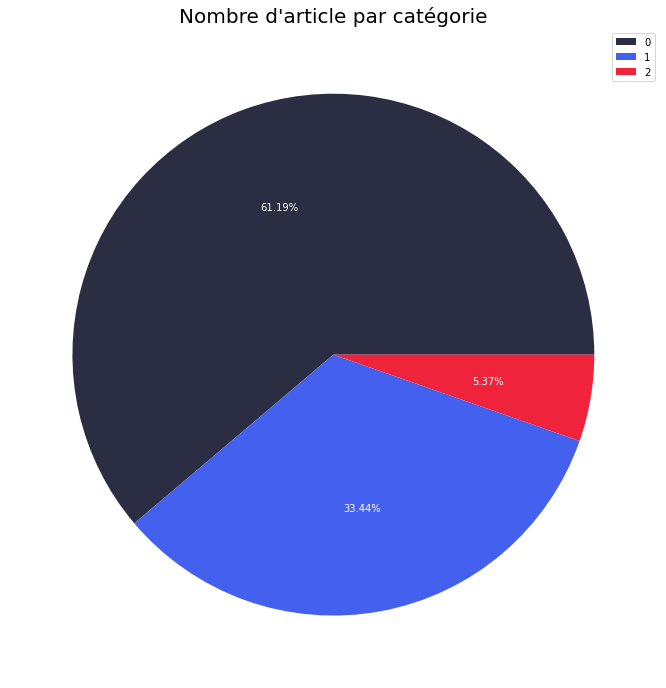

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=[12,12])
plt.pie(df.groupby("categ").id_prod.count(), labels = ["0","1","2"], colors=c, autopct = pct, textprops={'color':"w"})
plt.title("Nombre d'article par catégorie", fontsize=20)
plt.legend()
plt.show()
plt.savefig("nombre_article_par_categorie.png")

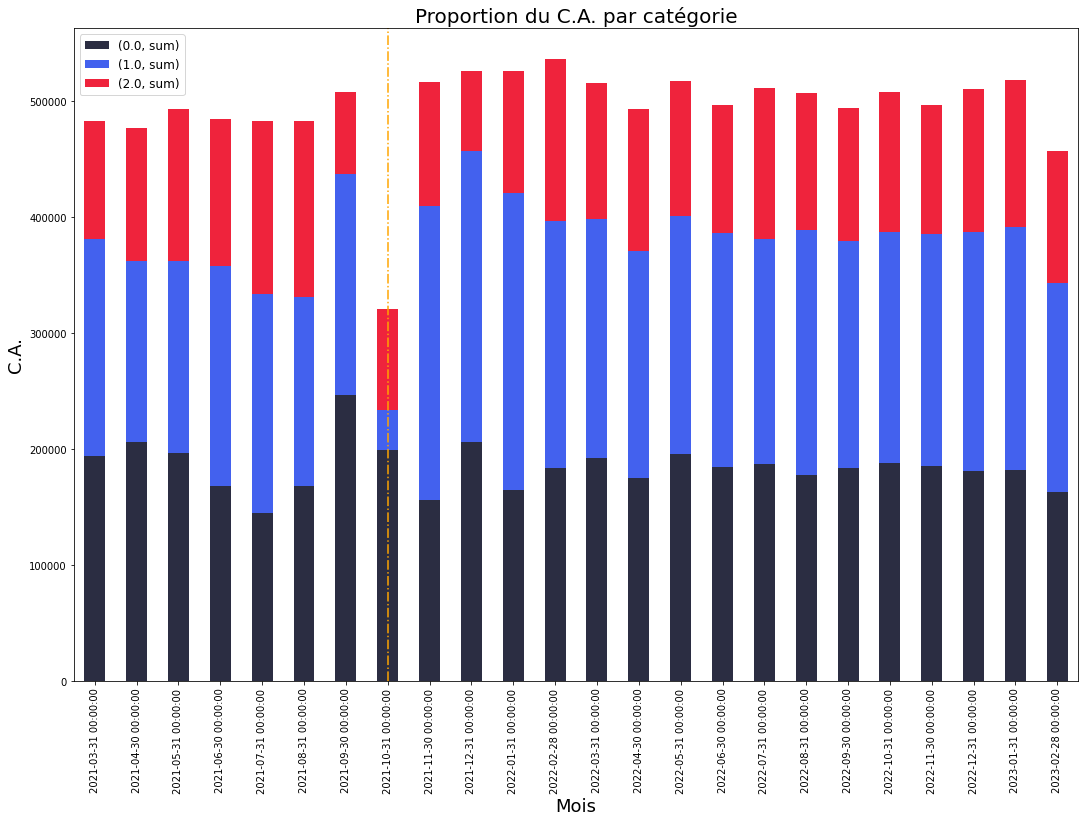

In [8]:
from IPython.core.pylabtools import figsize

turnover_categ = pd.pivot_table(df,index=df.index, columns="categ", values="price", aggfunc={"price":"sum"})
turnover_categ_m = turnover_categ.resample('M').agg(["sum"])
turnover_categ_m.plot(kind="bar",stacked = True, figsize=(18,12), color=c)
plt.axvline(7, color="orange", linestyle="-.")
plt.title("Proportion du C.A. par catégorie", fontsize=20)
plt.xlabel("Mois", fontsize=18)
plt.ylabel("C.A.", fontsize=18)
plt.legend(loc=2, prop={'size': 12})
plt.savefig("proportion_ca_par_categorie.png")

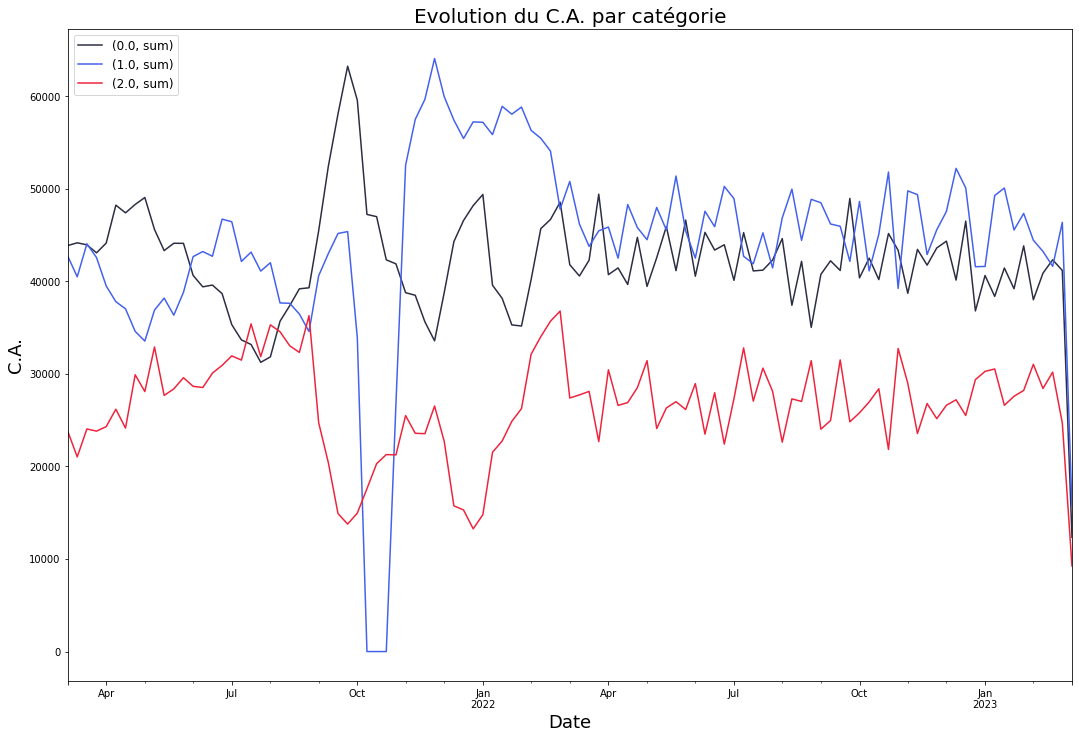

In [9]:
turnover_categ_w = turnover_categ.resample('W').agg(["sum"])
#turnover_categ_w
turnover_categ_w.plot(kind="line", figsize=(18,12), color=c)
plt.title("Evolution du C.A. par catégorie", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("C.A.", fontsize=18)
plt.legend(loc=2, prop={'size': 12})
plt.savefig("evolution_ca_par_categorie.png")

### Anomalie d'octobre 2021

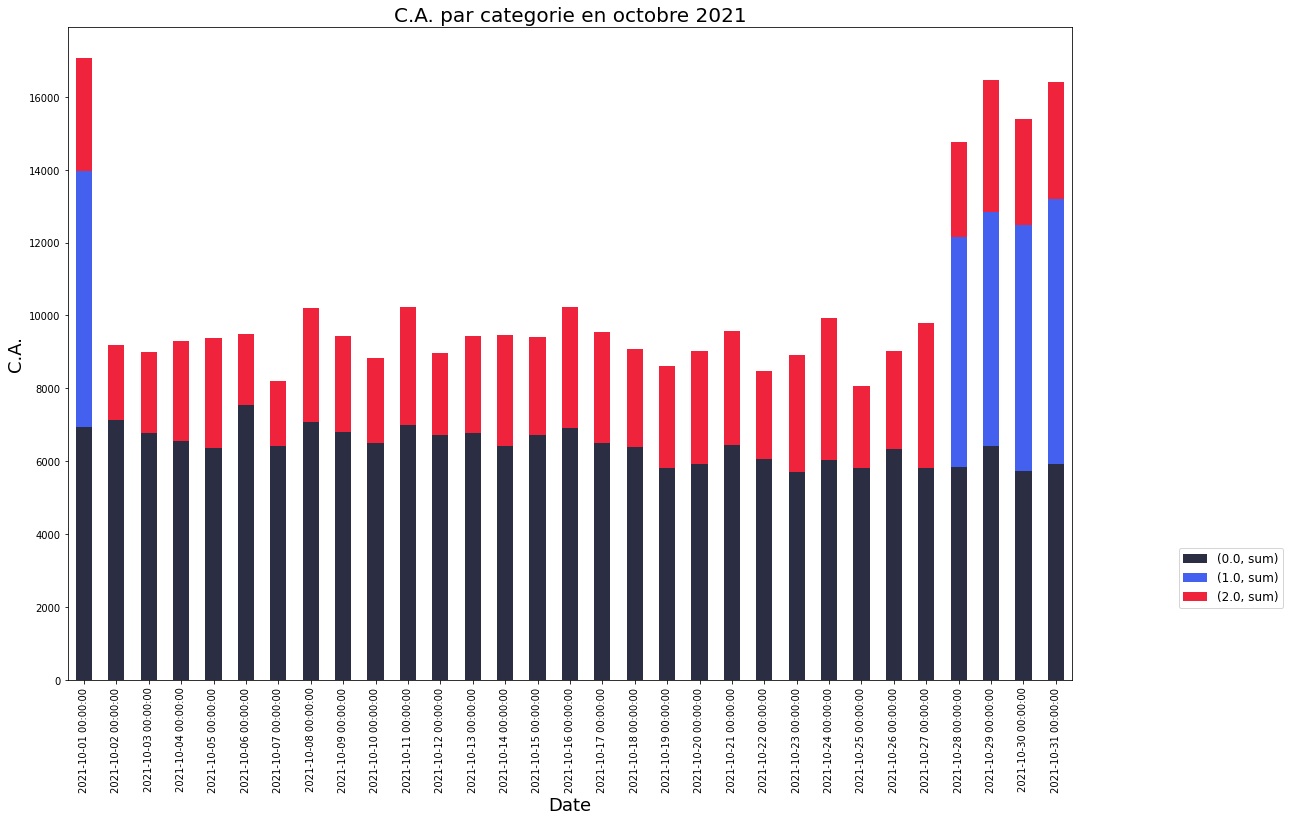

In [10]:
turnover_categ_octobre21 = turnover_categ.loc["2021-10"].resample('D').agg(["sum"])
turnover_categ_octobre21.plot(kind="bar",stacked = True, figsize=(18,12), color=c)
plt.title("C.A. par categorie en octobre 2021", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("C.A.", fontsize=18)
plt.legend(loc='lower left', bbox_to_anchor=(1.1,0.1), prop={'size': 12})
plt.savefig("anomalie_octobre_2021.png")

> ## __Analyse des clients__

In [11]:
print("Nombre de clients : \n", df.client_id.unique().shape)

Nombre de clients : 
 (8600,)


In [12]:
# Calcul du CA générer par client
turnover_client = df.groupby("client_id")[["price"]].sum()
turnover_client

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86
...,...
c_995,189.41
c_996,1625.58
c_997,1490.01


In [13]:
turnover_client.describe()

,price
count,8600.000000
mean,1378.613921
std,5182.880942
min,6.310000
25%,547.885000
50%,1027.210000
75%,1779.785000
max,324033.350000


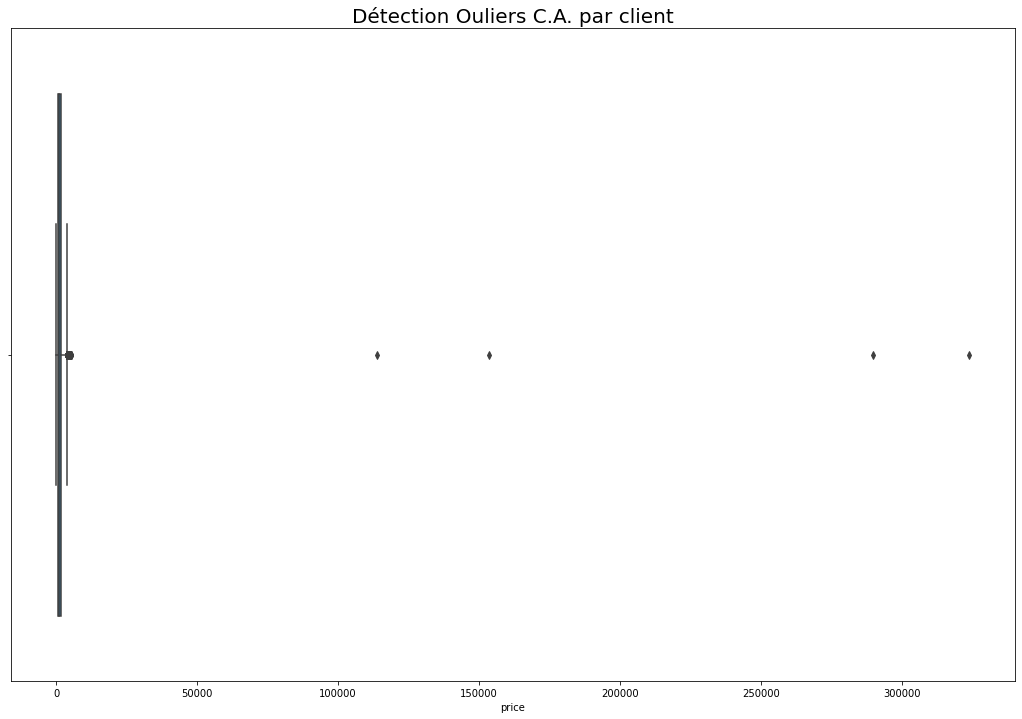

In [14]:
# Un oulier apparait clairement en max, je vais donc en rechercher d'autre
plt.figure(figsize=[18,12])
sns.boxplot(x = turnover_client.price)
plt.title("Détection Ouliers C.A. par client", fontsize=20)
plt.savefig("detection_retailer.png")

In [15]:
# 4 clients ont l'air de se démarquer des autres je vérifie dans mon dataframe
turnover_client.sort_values("price", ascending = False)

,price
client_id,
c_1609,324033.350000
c_4958,289760.340000
c_6714,153662.749128
c_3454,113669.844564
c_3263,5276.870000
...,...
c_4648,11.200000
c_240,11.060000
c_8114,9.980000


In [16]:
turnover_retailers = turnover_client.loc[turnover_client["price"]>5300]
turnover_retailers = turnover_retailers.sum()

In [17]:
# créatiton d'un dataframe pour les 4 plus gros client
c1609 = df[(df.client_id =="c_1609")==True]
c3454 = df[(df.client_id =="c_3454")==True]
c4958 = df[(df.client_id =="c_4958")==True]
c6714 = df[(df.client_id =="c_6714")==True]
# création d'une table pivot pour analyse du CA par catégorie
c1609 = pd.pivot_table(c1609,index=c1609.index, columns="categ", values="price", aggfunc={"price":"sum"})
c3454 = pd.pivot_table(c3454,index=c3454.index, columns="categ", values="price", aggfunc={"price":"sum"})
c4958 = pd.pivot_table(c4958,index=c4958.index, columns="categ", values="price", aggfunc={"price":"sum"})
c6714 = pd.pivot_table(c6714,index=c6714.index, columns="categ", values="price", aggfunc={"price":"sum"})
# resample par mois
c1609 = c1609.resample('M').agg(["sum"])
c3454 = c3454.resample('M').agg(["sum"])
c4958 = c4958.resample('M').agg(["sum"])
c6714 = c6714.resample('M').agg(["sum"])

<function matplotlib.pyplot.show>

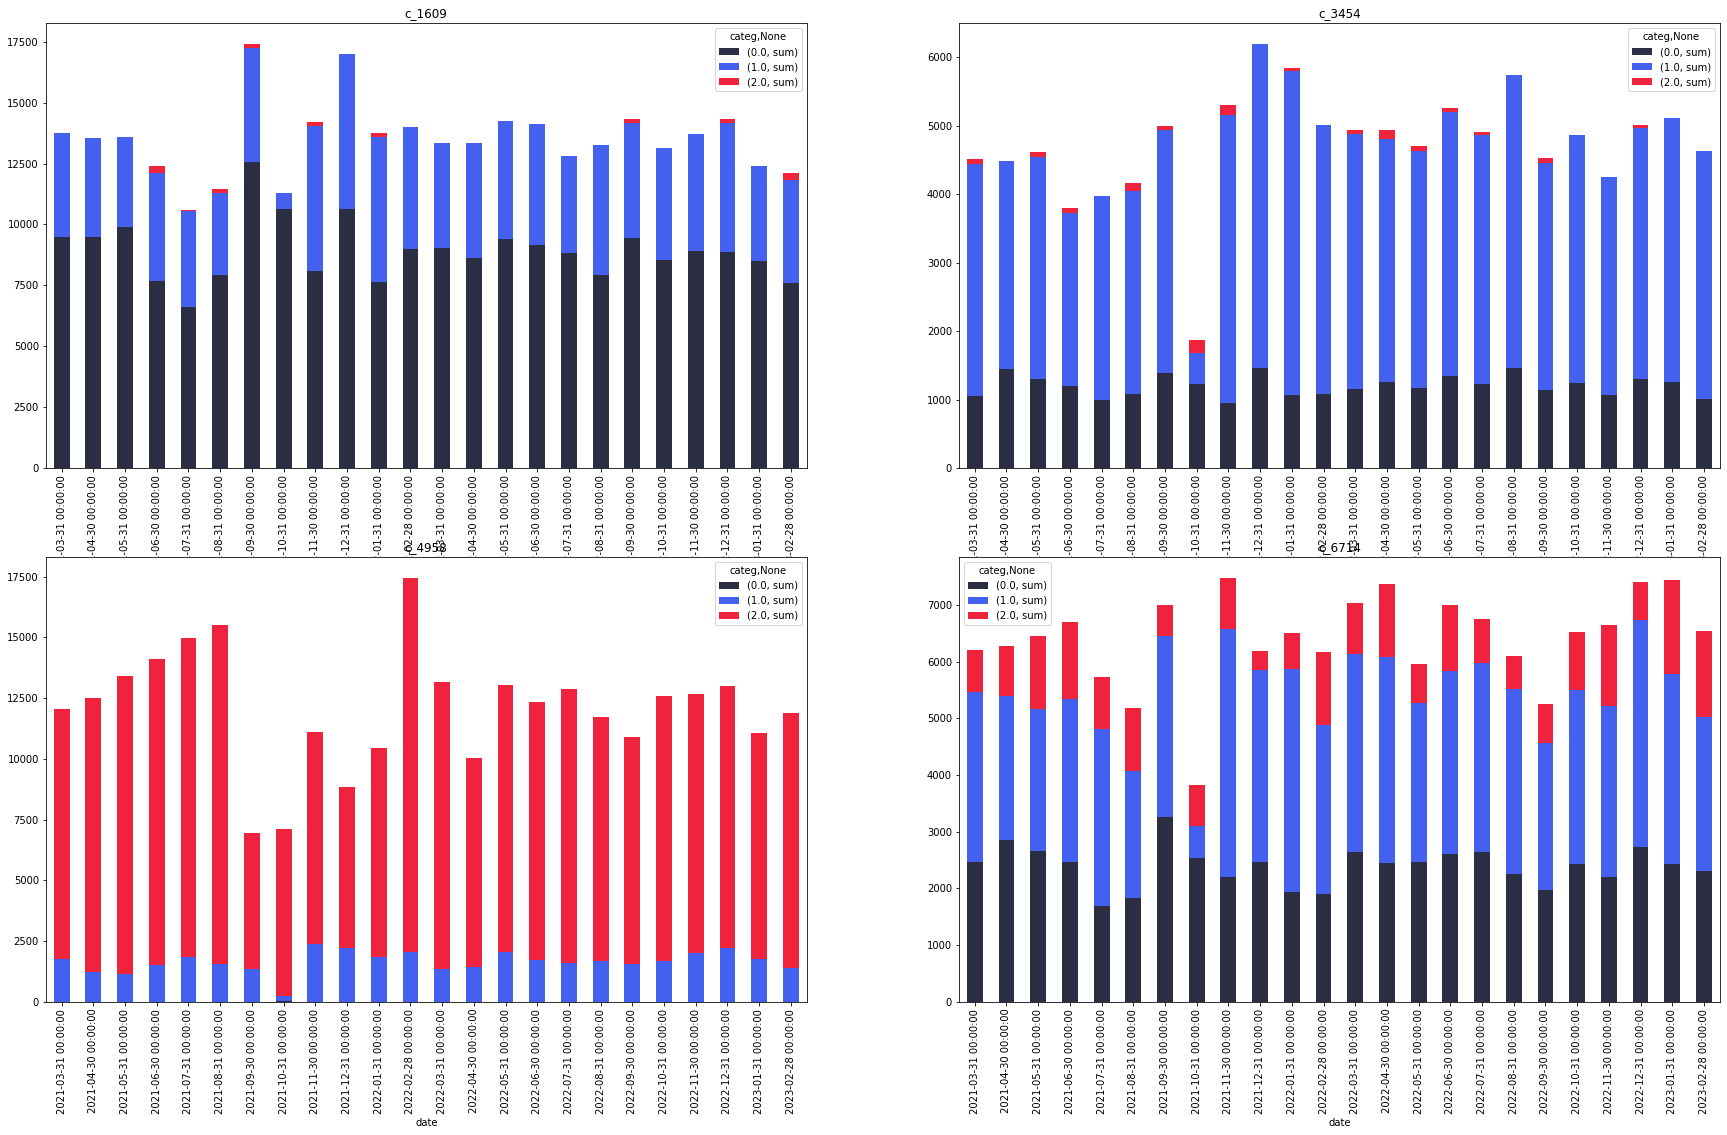

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[30,18])
c1609.plot(kind="bar", stacked=True, color=c, ax=axes[0,0]);axes[0,0].set_title("c_1609")
c3454.plot(kind="bar", stacked=True, color=c, ax=axes[0,1]);axes[0,1].set_title("c_3454")
c4958.plot(kind="bar", stacked=True, color=c, ax=axes[1,0]);axes[1,0].set_title("c_4958")
c6714.plot(kind="bar", stacked=True, color=c, ax=axes[1,1]);axes[1,1].set_title("c_6714")
plt.savefig("graphique_pas_beau_2021.png")
plt.show

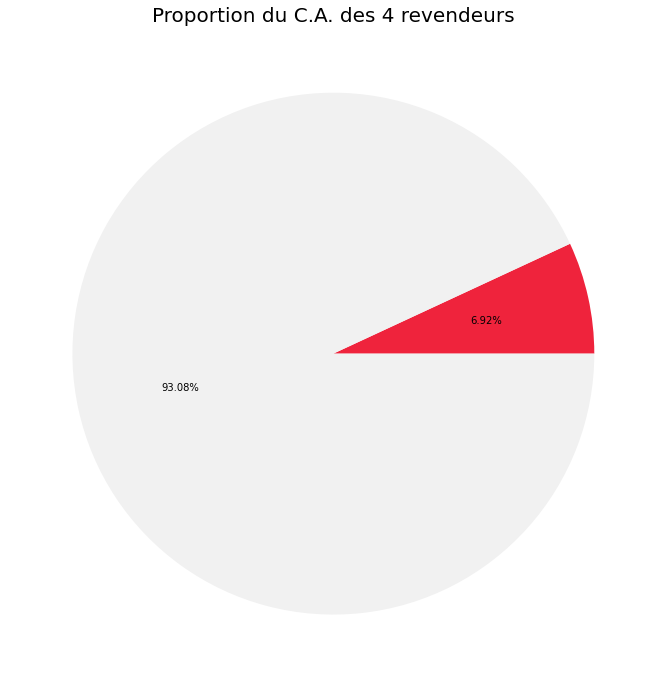

In [19]:

plt.figure(figsize=[12,12])
plt.pie([turnover_retailers,df.price.sum()], colors=["#ef233c", "#f1f1f1"],autopct = pct)
plt.title("Proportion du C.A. des 4 revendeurs", fontsize=20)
plt.savefig("proportion_du_ca_retailer.png")

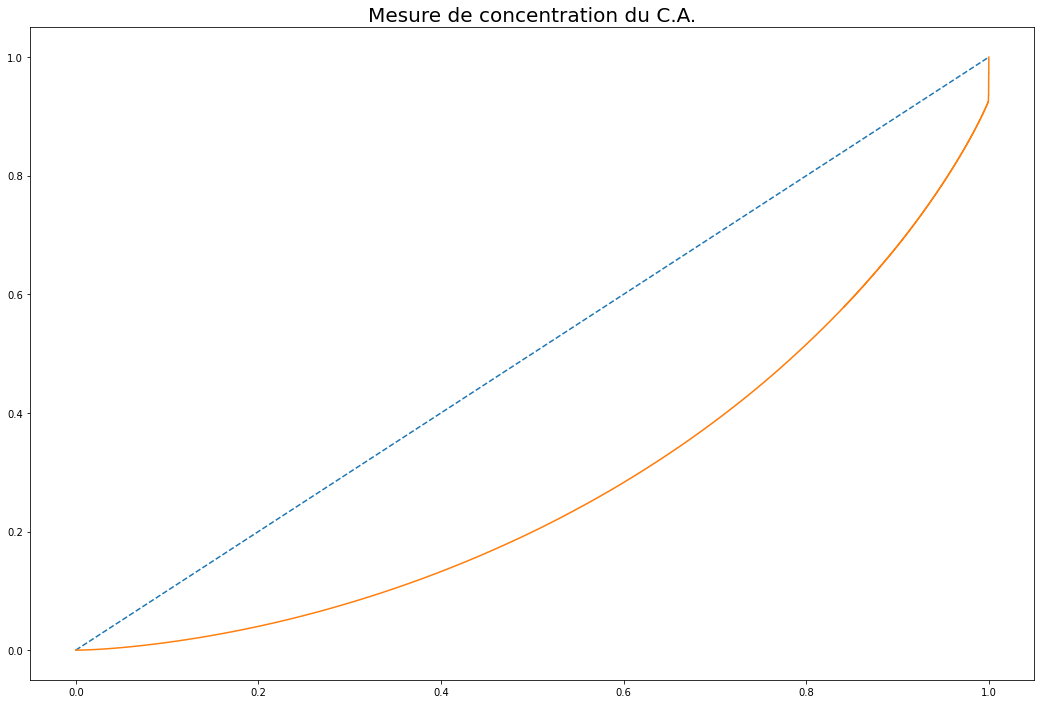

0.44639552269807137


In [47]:
df_cust = df.groupby("client_id")["price"].sum()
df_cust = df_cust.reset_index()
cum = df_cust.cumsum()
ca = df_cust.price
n = len(cum)
lrz = np.cumsum(np.sort(ca))/ca.sum()
lrz = np.append([0],lrz)

plt.figure(figsize=[18,12])
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis, np.linspace(0,1,len(lrz)),linestyle="--")
plt.plot(xaxis,lrz,drawstyle='steps-post')
plt.title("Mesure de concentration du C.A.", fontsize=20)
plt.savefig("mesure_de_concentration.png")
plt.show()
AUC = (lrz.sum() -lrz[-1]/2 -lrz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini
plt.show()
print(gini)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


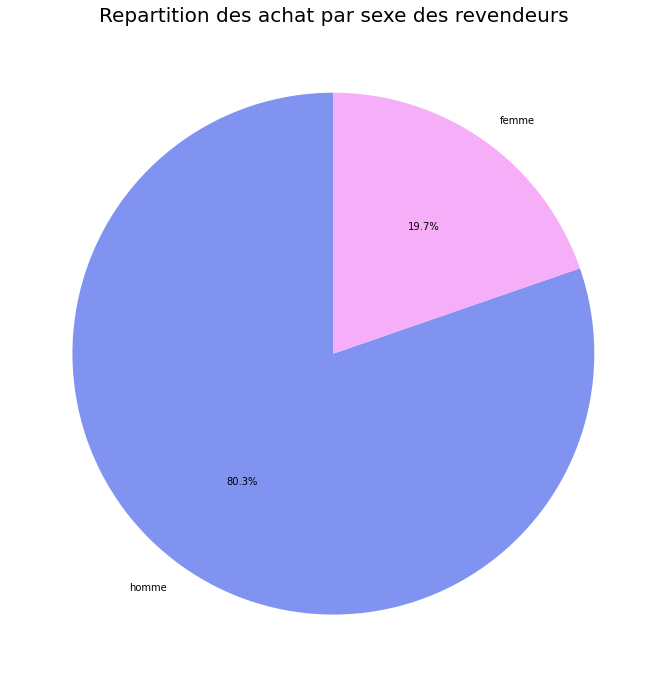

In [21]:
# Sexe des 4 revendeurs 
rt = df[df.client_id.isin(["c_1609","c_3454","c_4958","c_6714"])]
rt_h = rt.loc[rt["sex"]=="m"]
rt_f = rt.loc[rt["sex"]=="f"]
plt.figure(figsize=[12,12])
plt.pie([rt_h.sex.value_counts(),rt_f.sex.value_counts()],colors=["#8093f1","#f7aef8"], autopct= pct, startangle=90, labels=["homme","femme"])
plt.title("Repartition des achat par sexe des revendeurs", fontsize=20)
plt.savefig("repartition_des_achat_par_sexe_de_retailer.png")

## __Analyse des achat homme/femme__

In [22]:
dfc = df[(df.client_id.isin(["c_1609","c_3454","c_4958","c_6714"]))==False]
h = dfc.loc[df["sex"]=="m"]
f = dfc.loc[df["sex"]=="f"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


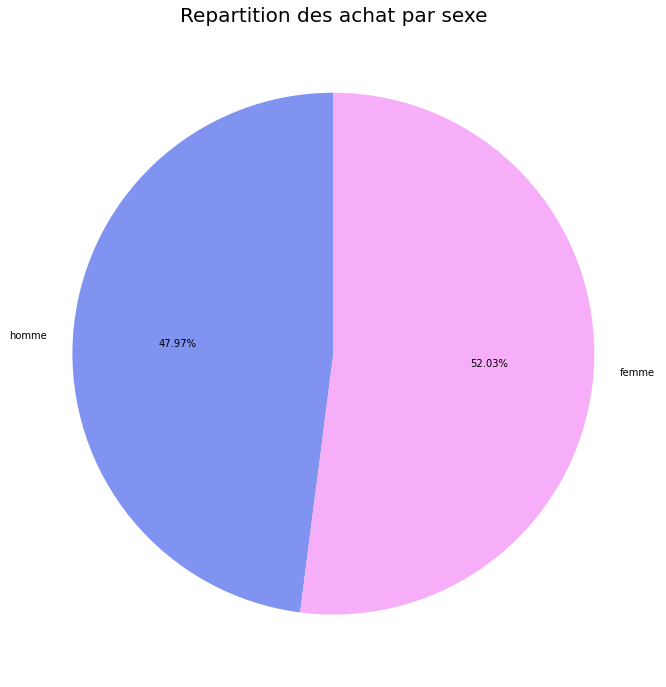

In [23]:
plt.figure(figsize=[12,12])
plt.pie([h.sex.value_counts(),f.sex.value_counts()],colors=["#8093f1","#f7aef8"], autopct= pct, startangle=90, labels=["homme","femme"])
plt.title("Repartition des achat par sexe",fontsize=20)
plt.savefig("repartion_des_achat_par_sexe.png")

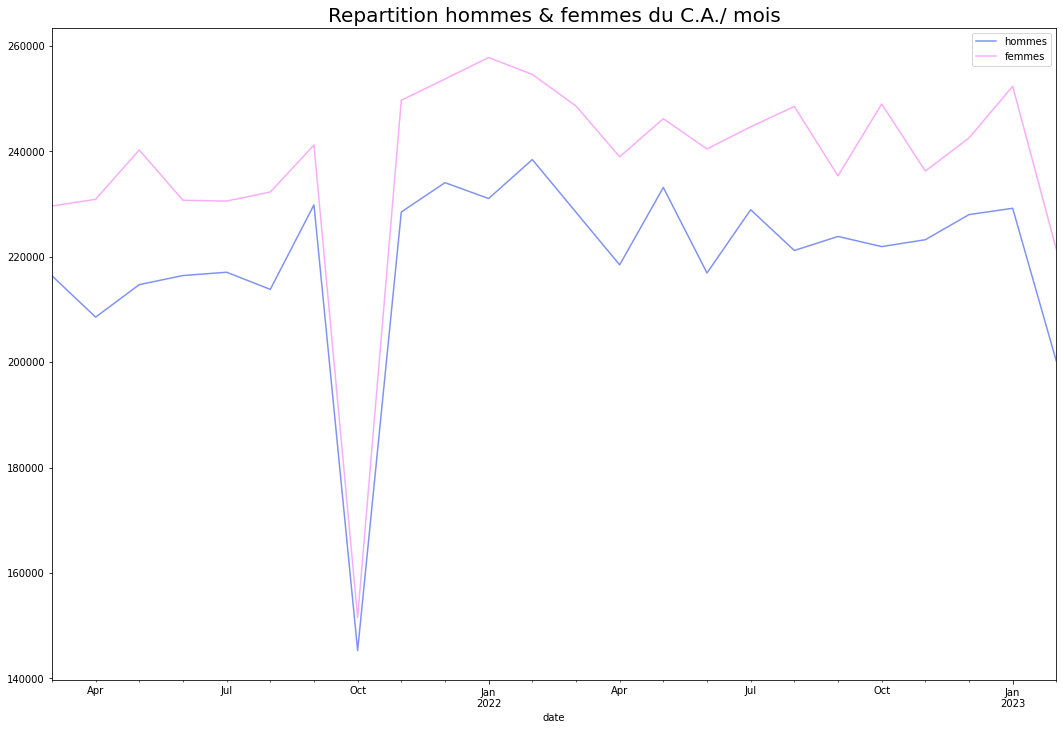

In [24]:
plt.figure(figsize=[18,12])
h.price.resample("M").agg("sum").plot(color="#8093f1")
f.price.resample("M").agg("sum").plot(color="#f7aef8")
plt.legend(["hommes","femmes"])
plt.title("Repartition hommes & femmes du C.A./ mois",fontsize=20)
plt.savefig("répartition_du_ca_par_sexe.png")

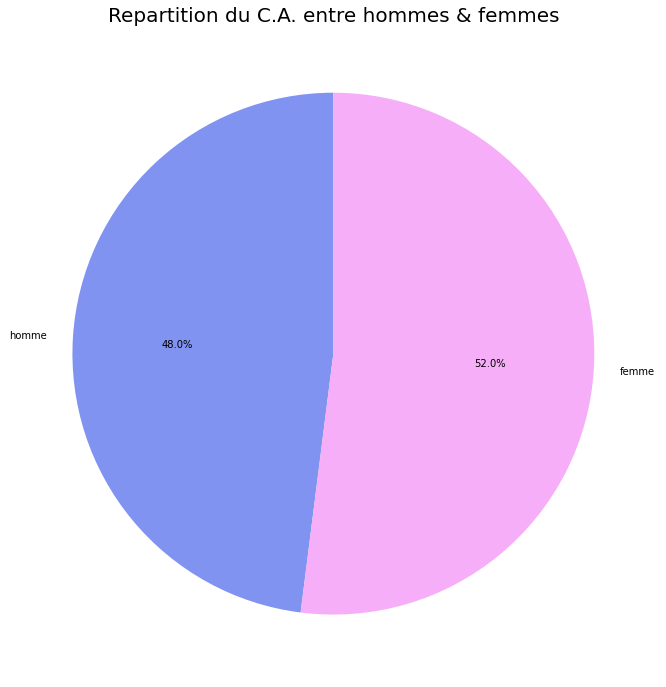

In [25]:
plt.figure(figsize=[12,12])
plt.pie([h.price.sum(),f.price.sum()],colors=["#8093f1","#f7aef8"], autopct= pct, startangle=90, labels=["homme","femme"])
plt.title("Repartition du C.A. entre hommes & femmes",fontsize=20)
plt.savefig("repartition_du_ca_par_sex_total")

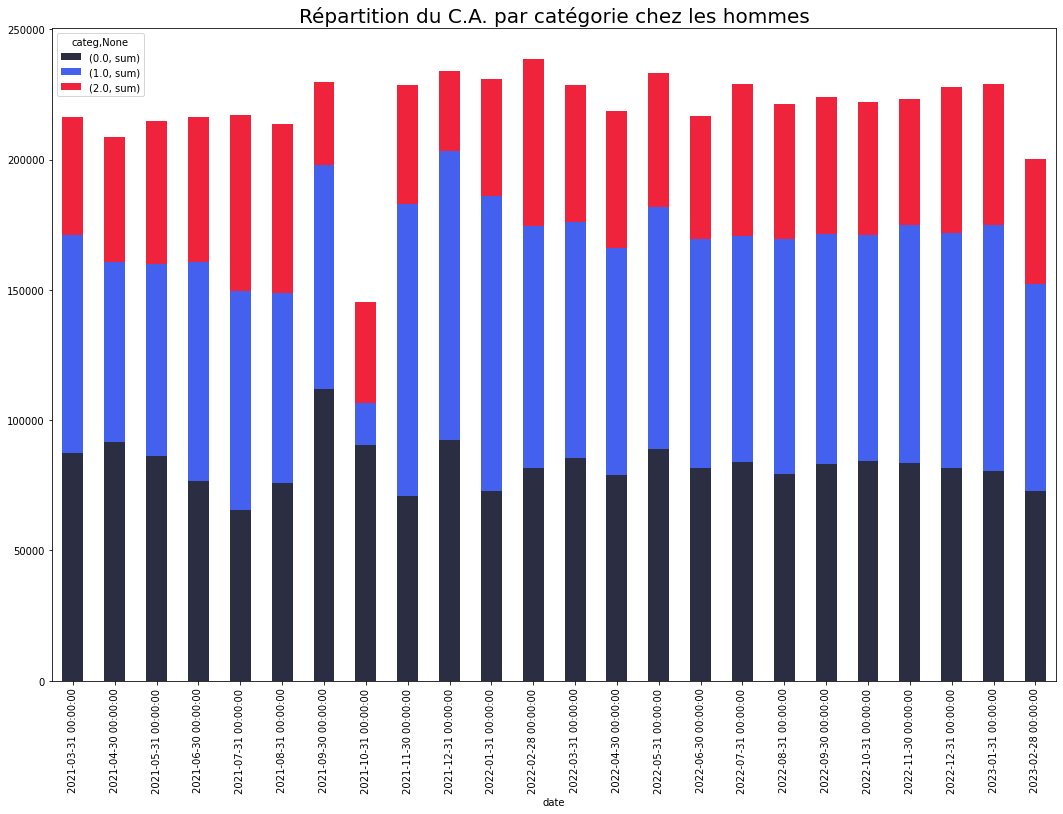

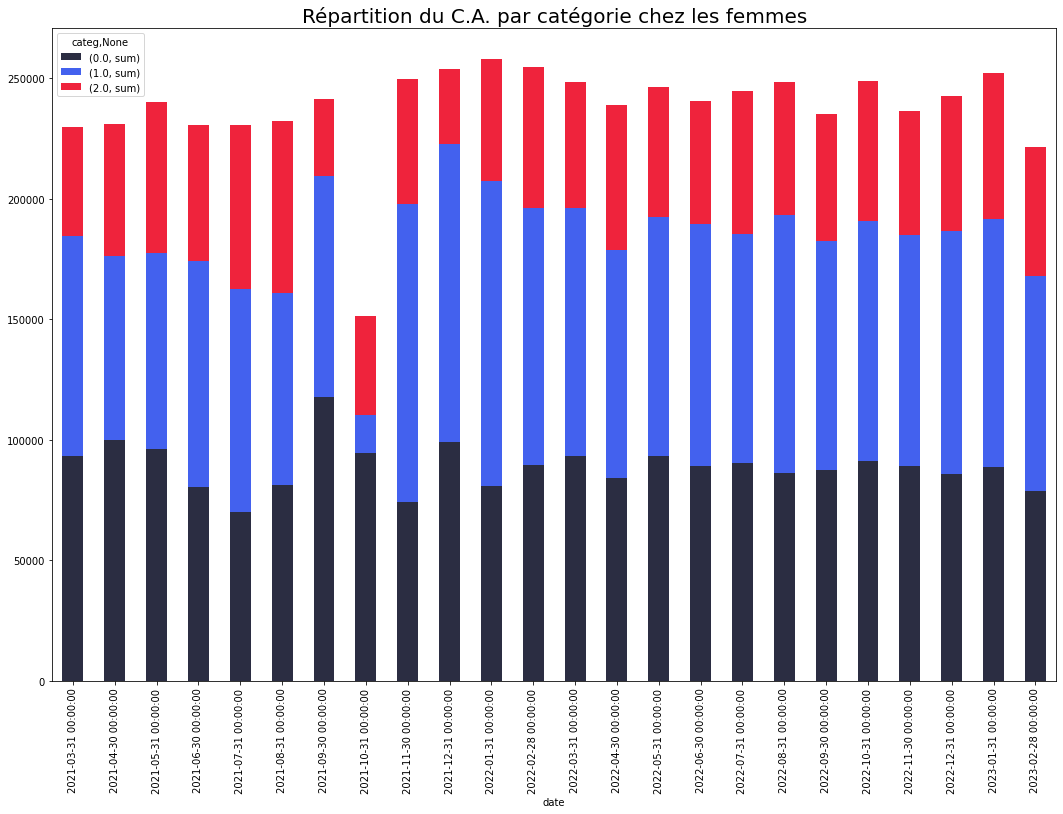

In [26]:
h_categ = pd.pivot_table(h, index=h.index, columns="categ", values="price", aggfunc={"price":"sum"})
h_categ_m = h_categ.resample("M").agg(["sum"])
f_categ = pd.pivot_table(f, index=f.index, columns="categ", values="price", aggfunc={"price":"sum"})
f_categ_m = f_categ.resample("M").agg(["sum"])

h_categ_m.plot(kind="bar",stacked = True, figsize=(18,12), color=c)
plt.title("Répartition du C.A. par catégorie chez les hommes",fontsize=20)
plt.savefig("Répartition_du_ca_par_categ_homme")
f_categ_m.plot(kind="bar",stacked = True, figsize=(18,12), color=c)
plt.title("Répartition du C.A. par catégorie chez les femmes",fontsize=20)
plt.savefig("Répartition_du_ca_par_categ_femme")

## __Analyse des ventes selon l'age des clients__

In [27]:
age = dfc.groupby("class_age").agg({"client_id":"count", "price":"sum"})

In [28]:
age

,client_id,price
class_age,,
19-24,37820,1.514683e+06
25-29,26473,1.080274e+06
30-34,61438,1.088992e+06
35-39,103188,1.361901e+06
40-44,107191,1.428252e+06
45-49,99497,1.309848e+06
50-54,59263,8.792586e+05
55-59,41555,6.975916e+05
60-64,27718,4.673263e+05


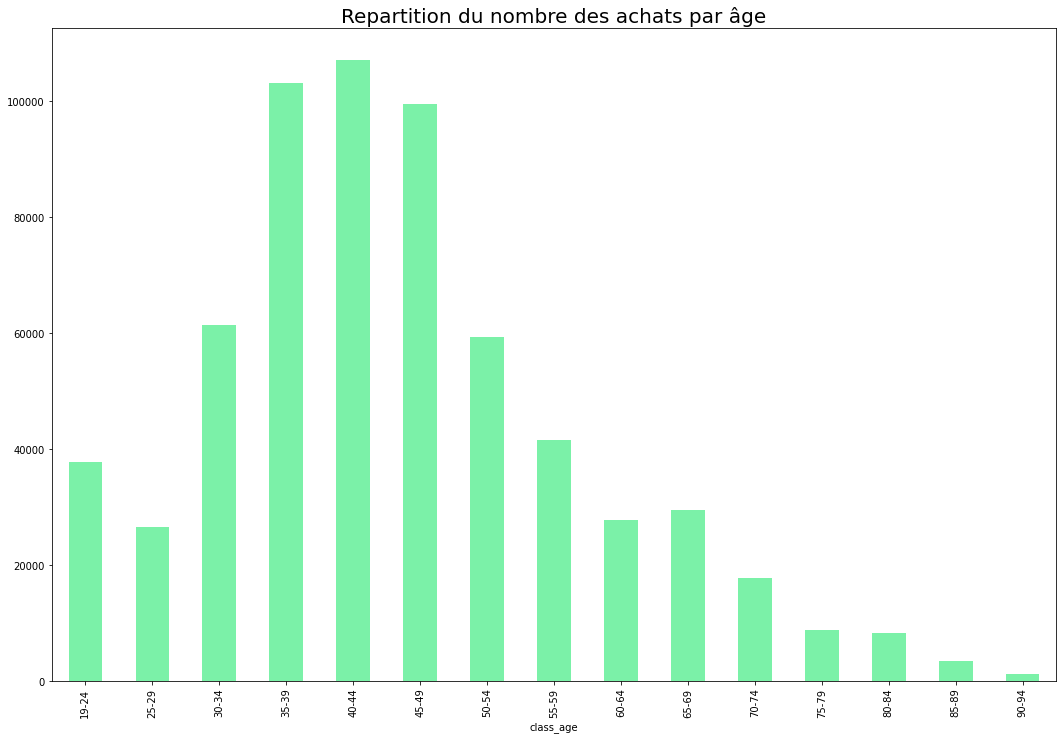

In [29]:
plt.figure()
age.client_id.plot(kind="bar", color= "#7bf1a8", legend= False, figsize=[18,12])
plt.title("Repartition du nombre des achats par âge",fontsize=20)
plt.savefig("Répartition_du_nombre_achat_age.png")

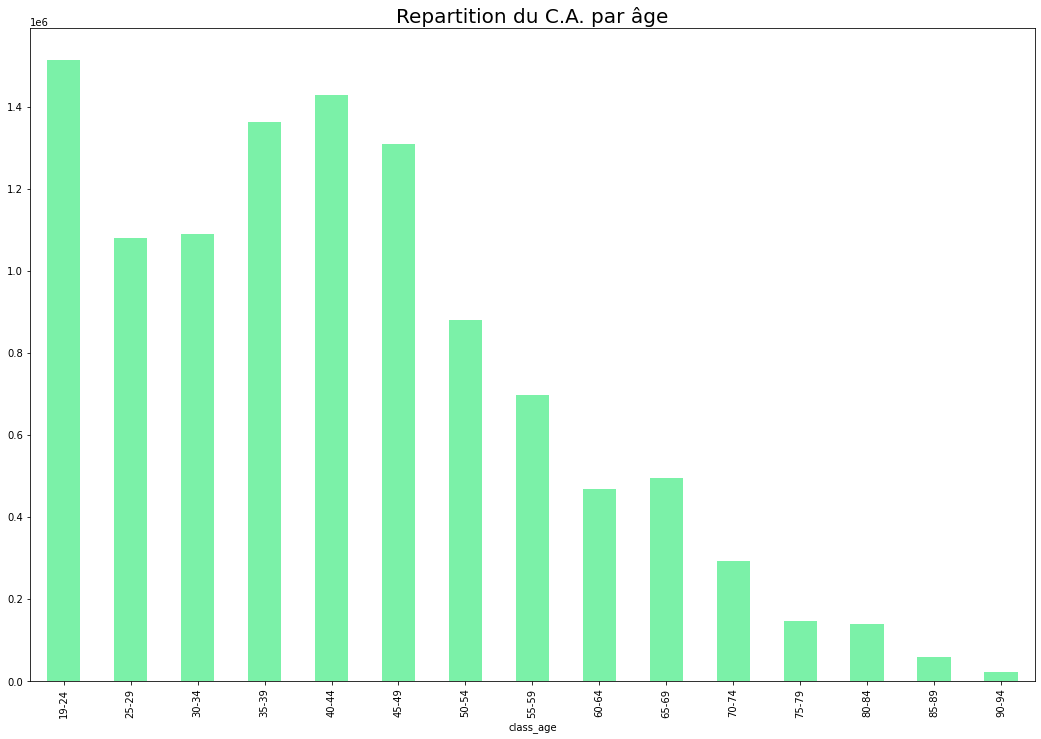

In [30]:
plt.figure()
age.price.plot(kind="bar", color= "#7bf1a8", legend= False, figsize=[18,12])
plt.title("Repartition du C.A. par âge",fontsize=20)
plt.savefig("Répartition_du_ca_age.png")

> Les jeune semblent avoir un panier moyen plus élevé

In [31]:
age_categ = pd.pivot_table(dfc, index="class_age", columns="categ", values="price", aggfunc={"price":"sum"})

<Figure size 432x288 with 0 Axes>

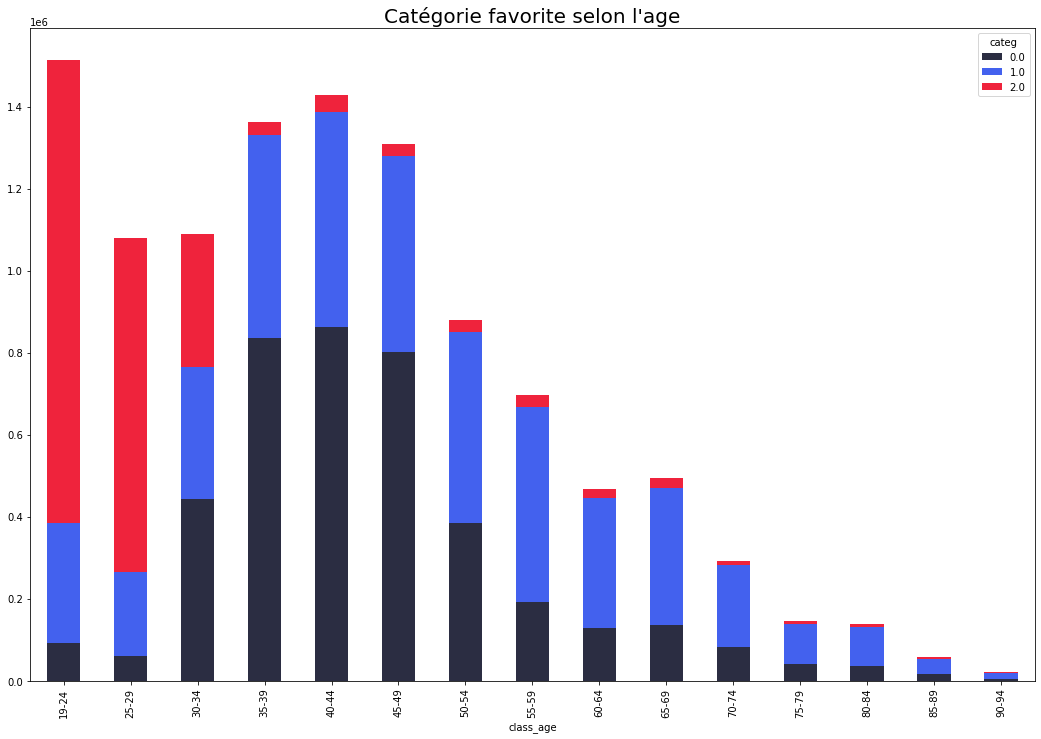

In [32]:
plt.figure()
age_categ.plot(kind="bar", stacked= True, color=c, figsize=[18,12])
plt.title("Catégorie favorite selon l'age",fontsize=20)
plt.show
plt.savefig("categ_favorite_age.png")

<Figure size 432x288 with 0 Axes>

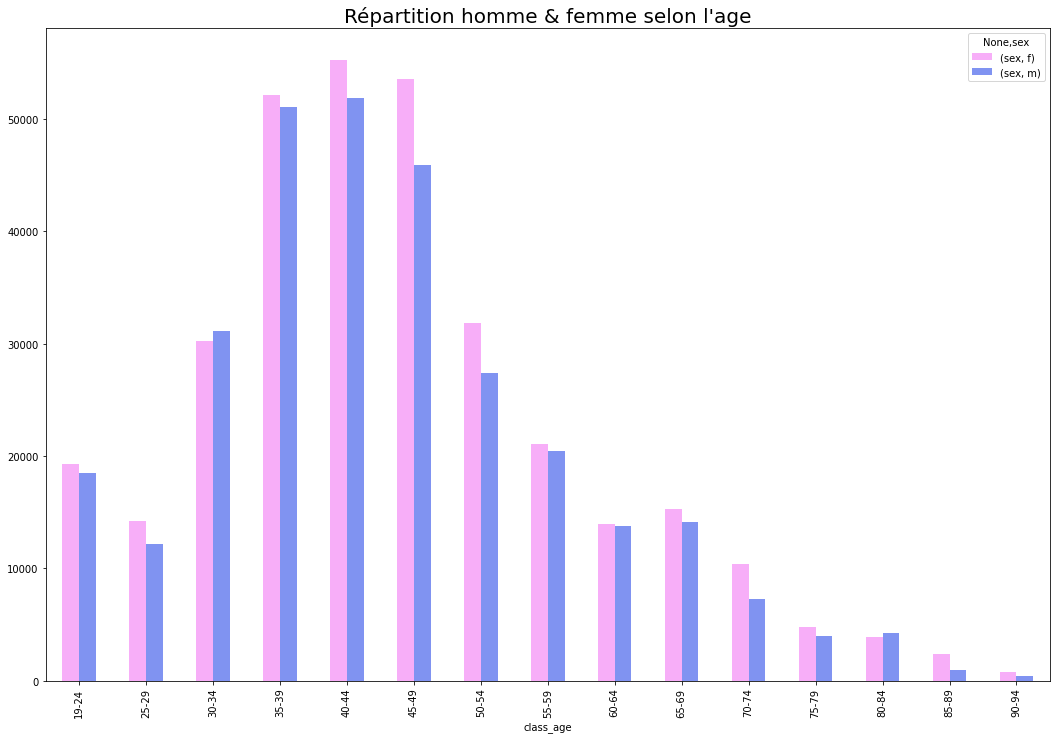

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

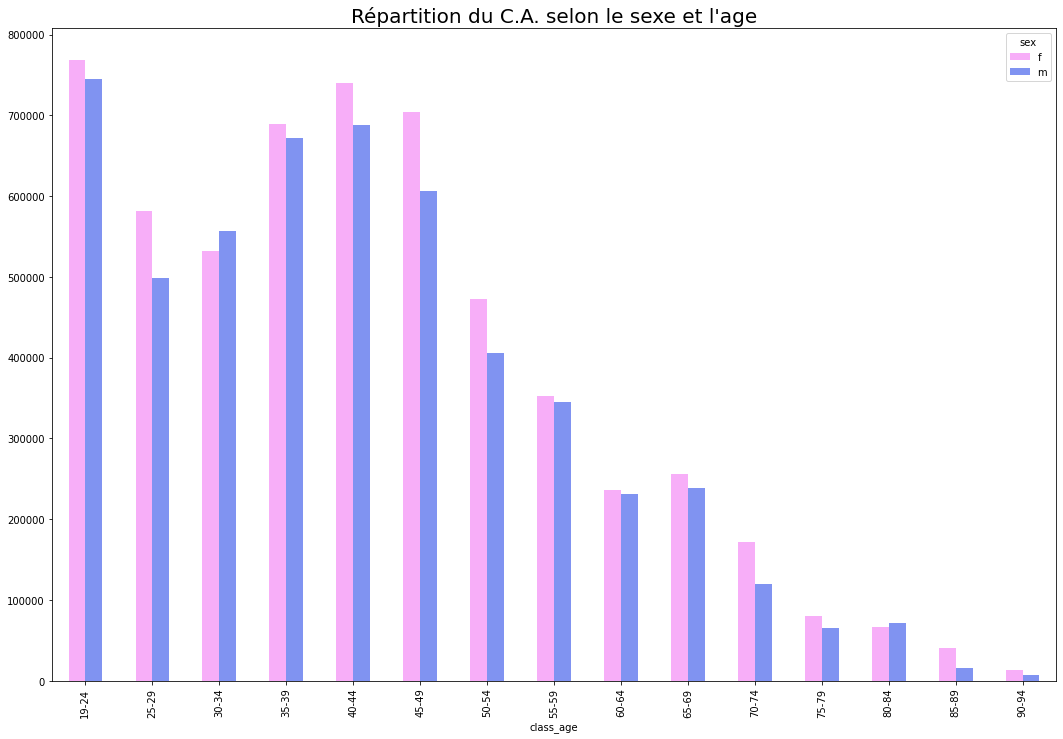

<Figure size 432x288 with 0 Axes>

In [33]:
age_sexe = pd.pivot_table(dfc, index="class_age", columns="sex", aggfunc={"sex":"count"})
plt.figure()
age_sexe.plot(kind="bar", color=["#f7aef8","#8093f1"], figsize=[18,12])
plt.title("Répartition homme & femme selon l'age",fontsize=20)
plt.show()
plt.savefig("Répartition_homme_femme_age.png")
age_sexe_ca = pd.pivot_table(dfc, index="class_age", columns="sex", values="price", aggfunc={"price":"sum"})
plt.figure()
age_sexe_ca.plot(kind="bar",color=["#f7aef8","#8093f1"], figsize=[18,12])
plt.title("Répartition du C.A. selon le sexe et l'age",fontsize=20)
plt.show()
plt.savefig("Répartition_du_ca_sex_age.png")

## __Évolution du C.A.__

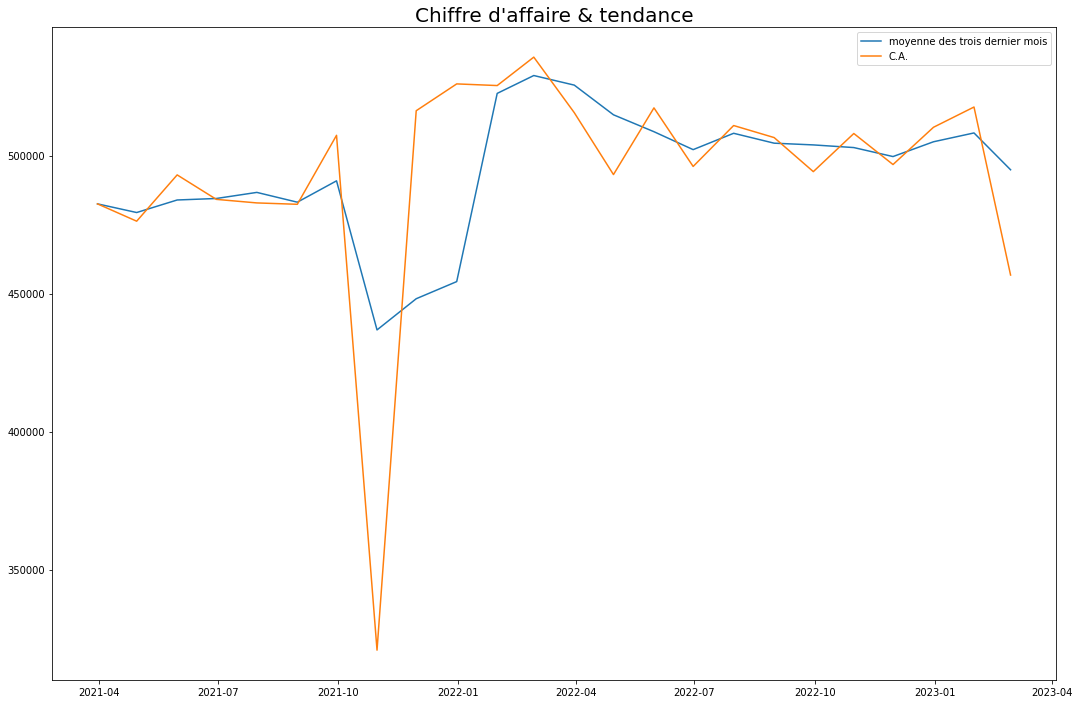

In [34]:
plt.figure(figsize=[18,12])
plt.plot(turnover_mensuel.rolling(window=3, min_periods=1).mean())
plt.plot(turnover_mensuel)
plt.legend(["moyenne des trois dernier mois","C.A."])
plt.title("Chiffre d'affaire & tendance",fontsize=20)
plt.savefig("ca_&_tendance.png")

## __Top & flop__

In [35]:
topnflop = df.groupby("id_prod").agg({"price":["sum","count"]})
topnflop_nb_vente = topnflop.sort_values(("price","count"), ascending = False)
topnflop_nb_vente
# Top & flop en terme de nombre de vente

price      
              sum count
id_prod                
1_369    54025.48  2252
1_417    45947.11  2189
1_414    51949.40  2180
1_498    49731.36  2128
1_425    35611.04  2096
...           ...   ...
0_1284       1.38     1
0_549        2.99     1
0_1498       2.48     1
0_541        1.99     1
0_886       21.82     1

[3266 rows x 2 columns]

In [36]:
topnflop = df.groupby("id_prod").agg({"price":["sum","count"]})
topnflop_nb_vente = topnflop.sort_values(("price","sum"), ascending = False)
topnflop_nb_vente
# Top & flop en terme de C.A. par produit

price      
              sum count
id_prod                
2_159    94893.50   650
2_135    69334.95  1005
2_112    65407.76   968
2_102    60736.78  1027
2_209    56971.86   814
...           ...   ...
0_1601       1.99     1
0_807        1.99     1
0_1653       1.98     2
0_1284       1.38     1
0_1539       0.99     1

[3266 rows x 2 columns]

In [37]:
tnf = df.groupby(["categ","id_prod"]).agg({"price":["sum","count"]})
tnf = tnf.reset_index()
tnf_categ0 = tnf.loc[tnf["categ"]==0]
tnf_categ1 = tnf.loc[tnf["categ"]==1]
tnf_categ2 = tnf.loc[tnf["categ"]==2]

In [38]:
tnf_categ0.sort_values(("price","count"),ascending=False)
# Top & flop du nombre de vente de la catégorie 0

categ id_prod     price      
                         sum count
466    0.0  0_1422  14741.72  1292
476    0.0  0_1431  14089.18  1282
469    0.0  0_1425  16445.34  1266
477    0.0  0_1432  19261.44  1254
454    0.0  0_1411  11201.54  1246
...    ...     ...       ...   ...
1793   0.0   0_549      2.99     1
752    0.0  0_1683      2.99     1
313    0.0  0_1284      1.38     1
549    0.0  0_1498      2.48     1
166    0.0  0_1151      2.99     1

[2293 rows x 4 columns]

In [39]:
tnf_categ0.sort_values(("price","sum"),ascending=False)
# Top & flop du C.A. par produit de la catégorie 0

categ id_prod     price      
                         sum count
487    0.0  0_1441  23452.65  1235
465    0.0  0_1421  23008.49  1151
457    0.0  0_1414  22287.00  1150
498    0.0  0_1451  21689.15  1085
460    0.0  0_1417  21372.12  1188
...    ...     ...       ...   ...
665    0.0  0_1601      1.99     1
1785   0.0   0_541      1.99     1
719    0.0  0_1653      1.98     2
313    0.0  0_1284      1.38     1
595    0.0  0_1539      0.99     1

[2293 rows x 4 columns]

In [40]:
tnf_categ1.sort_values(("price","count"),ascending=False)
# Top & flop du nombre de vente de la catégorie 1

categ id_prod     price      
                         sum count
2592   1.0   1_369  54025.48  2252
2645   1.0   1_417  45947.11  2189
2642   1.0   1_414  51949.40  2180
2734   1.0   1_498  49731.36  2128
2654   1.0   1_425  35611.04  2096
...    ...     ...       ...   ...
2635   1.0   1_408    105.72     3
2636   1.0   1_409    167.97     3
2629   1.0   1_402     69.04     2
2649   1.0   1_420     14.24     2
2753   1.0   1_514    135.32     2

[737 rows x 4 columns]

In [41]:
tnf_categ1.sort_values(("price","sum"),ascending=False)
# Top & flop du C.A. par produit de la catégorie 1

categ id_prod     price      
                         sum count
2620   1.0   1_395  54356.25  1875
2592   1.0   1_369  54025.48  2252
2642   1.0   1_414  51949.40  2180
2608   1.0   1_383  51486.24  1776
2734   1.0   1_498  49731.36  2128
...    ...     ...       ...   ...
2631   1.0   1_404     29.55     3
2707   1.0   1_473     26.91     9
2704   1.0   1_470     21.64     4
2432   1.0   1_224     19.80     4
2649   1.0   1_420     14.24     2

[737 rows x 4 columns]

In [42]:
tnf_categ2.sort_values(("price","count"),ascending=False)
# Top & flop du nombre de vente de la catégorie 2

categ id_prod     price      
                         sum count
3035   2.0   2_102  60736.78  1027
3071   2.0   2_135  69334.95  1005
3046   2.0   2_112  65407.76   968
3202   2.0    2_39  53060.85   915
3200   2.0    2_37  43209.18   882
...    ...     ...       ...   ...
3259   2.0    2_93    157.98     2
3243   2.0    2_77    291.98     2
3248   2.0    2_81     86.99     1
3176   2.0    2_23    115.99     1
3264   2.0    2_98    149.74     1

[236 rows x 4 columns]

In [43]:
tnf_categ2.sort_values(("price","sum"),ascending=False)
# Top & flop du C.A. par produit de la catégorie 2

categ id_prod     price      
                         sum count
3097   2.0   2_159  94893.50   650
3071   2.0   2_135  69334.95  1005
3046   2.0   2_112  65407.76   968
3035   2.0   2_102  60736.78  1027
3153   2.0   2_209  56971.86   814
...    ...     ...       ...   ...
3040   2.0   2_107    203.94     6
3259   2.0    2_93    157.98     2
3264   2.0    2_98    149.74     1
3176   2.0    2_23    115.99     1
3248   2.0    2_81     86.99     1

[236 rows x 4 columns]

## __Panier moyen des clients__

In [44]:
all_panier_moyen = df.groupby("session_id")["price"].sum().mean()
c_panier_moyen = dfc.groupby("session_id")["price"].sum().mean()
print("\n Panier moyen tout les utilisateur compris",all_panier_moyen,"\n Panier moyen sans les 4 plus gros retailer",c_panier_moyen,"\n Pas de différence notable")


 Panier moyen tout les utilisateur compris 34.634999107786165 
 Panier moyen sans les 4 plus gros retailer 34.37471712662864 
 Pas de différence notable


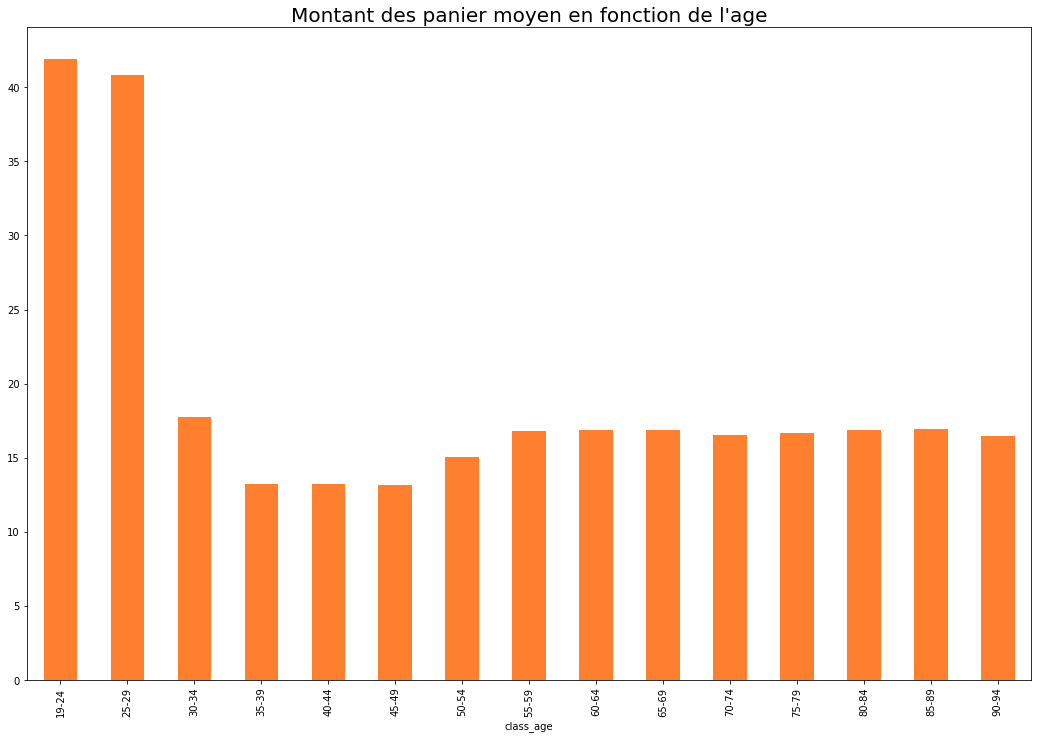

In [45]:
panier_moyen = df.groupby("class_age")["price"].sum()
panier_moyen = panier_moyen.reset_index()
nb_session = df.groupby("class_age")["session_id"].count()
nb_session = nb_session.reset_index()
panier_moyen = panier_moyen.merge(nb_session ,how="inner", on="class_age")
panier_moyen["panier"] = panier_moyen.price / panier_moyen.session_id
panier_moyen = panier_moyen.set_index("class_age")
plt.figure(figsize=[18,12])
panier_moyen.panier.plot(kind="bar", color="#fe7f2d")
plt.title("Montant des panier moyen en fonction de l'age",fontsize=20)
plt.savefig("Montant_des_panier_Par_age")